# DSCI 552 HW 2

**Name: Cheng Peng**
<br>**USD ID: 6898-9638-37**<br/>



# Part A: Download the dataset 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = "../data/CCPP/Folds5x2_pp.xlsx"
path = ""
df = pd.read_excel(path)

FileNotFoundError: ignored

In [ ]:
df.head()

# Part B: Exploring the dataset 

# i) Number of rows and columns

In [ ]:
columns = df.columns
rows = len(df)
print("There are {} columns and {} rows".format(len(columns), rows))

There are 5 columns and 9568 rows


In [ ]:
print("The coluhmns are {}".format(columns))

The coluhmns are Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


# ii) Pairwise plots

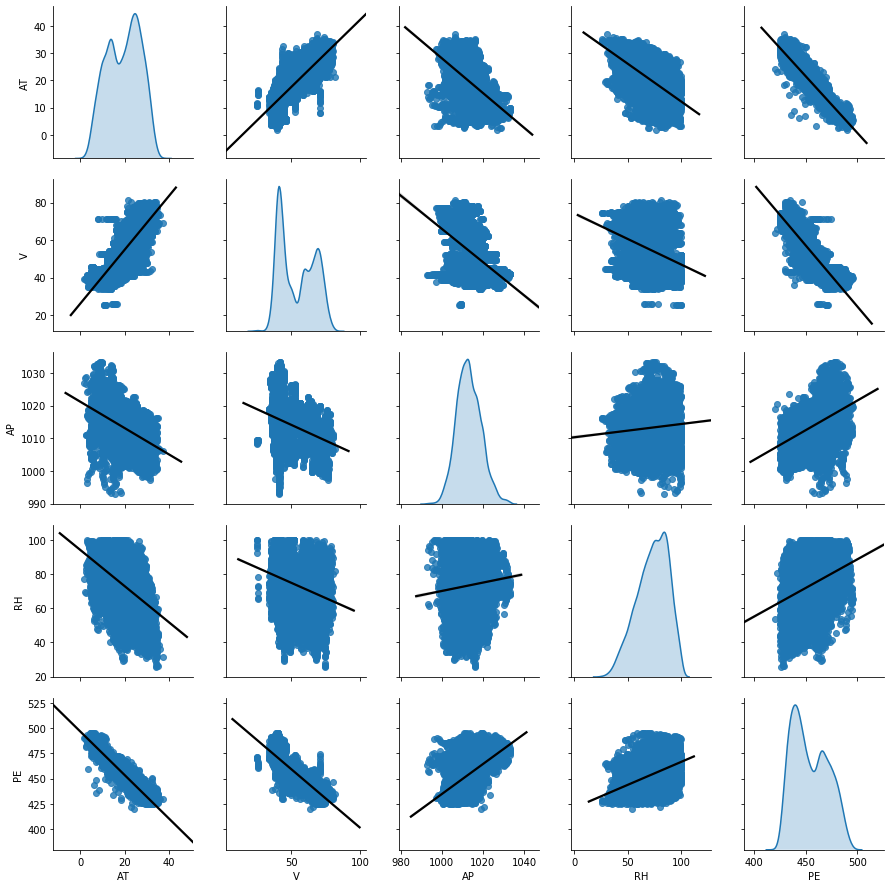

In [ ]:
scatter_plot = sns.pairplot(df, diag_kind="kde", kind="reg", plot_kws={"line_kws":{"color":"black"}})


Comment: AT and PE has a strong relationship. As AT value decreases, PE value also decreases. 

# iii) Mean, median, range, 1&3 quartiles, interquartile range 

In [ ]:
mean = df.mean(axis=0)
median = df.median(axis=0)
data_range = df.max() - df.min()
first_q = df.quantile(q=0.25)
third_q = df.quantile(q=0.75)
iqr = third_q - first_q

In [ ]:
pd.DataFrame([mean, median, data_range, first_q, third_q, iqr], index=["Mean", "Median", "Range", "First_Q", "Third_Q", "IQR"])

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
First_Q,13.510000,41.740000,1009.100000,63.327500,439.750000
Third_Q,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


# Part C

In [ ]:
# Part C

const    497.03412
AT        -2.17132
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:38:02   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

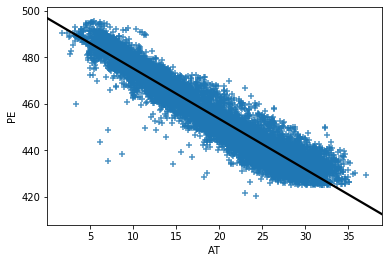

In [ ]:
import statsmodels.api as sm 
import numpy as np 

X_AT = df["AT"]
y = df["PE"]
X_AT = sm.add_constant(X_AT) # add a columns of ones to the array 
results_AT = sm.OLS(y, X_AT).fit()
print(results_AT.params)
print(results_AT.summary())
sns.regplot(x= "AT", y="PE", data = df[["AT", "PE"]], line_kws={"color":"black"}, marker = "+")
plt.show()



In [ ]:
# find the outliers 
outliers_AT = results_AT.outlier_test()
outliers_AT = outliers_AT[outliers_AT["bonf(p)"]<0.10]
outliers_AT_points = outliers_AT.index
outliers_AT_points = df.iloc[outliers_AT_points]
print("There are {} outlier points".format(len(outliers_AT_points)))
outliers_AT_points

There are 11 outlier points


,AT,V,AP,RH,PE
1438,15.61,38.52,1018.40,80.99,439.21
3117,8.74,36.30,1015.18,61.97,438.63
3383,6.22,39.85,1012.05,86.88,443.73
3895,14.69,49.64,1023.43,78.17,434.12
4218,23.00,66.05,1020.61,80.29,421.57
7375,18.60,58.71,1009.80,86.42,430.38
7398,7.06,41.74,1021.95,90.38,448.97
7664,7.14,41.22,1016.60,97.09,435.58
8187,18.26,61.27,1019.10,74.74,428.67
8362,3.40,39.64,1011.10,83.43,459.86


const    517.801526
V         -1.168135
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:38:11   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

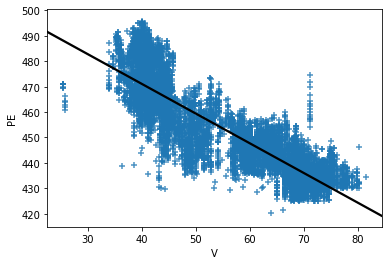

In [ ]:
X_V = df["V"]
X_V = sm.add_constant(X_V) # add a columns of ones to the array 
y = df["PE"]
results_V = sm.OLS(y, X_V).fit()
print(results_V.params)
print(results_V.summary())
sns.regplot(x= "V", y="PE", data = df[["V", "PE"]], line_kws={"color":"black"}, marker = "+")
plt.show()

In [ ]:
# find the outliers 
outliers_V = results_V.outlier_test()
outliers_V = outliers_V[outliers_V["bonf(p)"]<0.1]
outliers_V_points = outliers_V.index
outliers_V_points = df.iloc[outliers_V_points]
print("There are {} outlier points".format(len(outliers_V_points)))
outliers_V_points

There are 2 outlier points


,AT,V,AP,RH,PE
1709,8.13,71.14,1018.94,86.70,471.99
3103,7.89,71.14,1018.40,86.49,474.66


const   -1055.260989
AP          1.489872
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:38:19   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

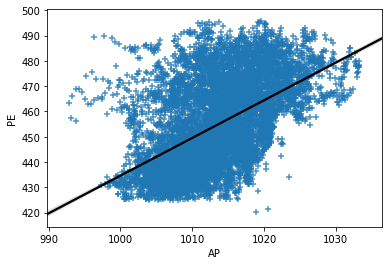

In [ ]:
X_AP = df["AP"]
X_AP = sm.add_constant(X_AP) # add a columns of ones to the array 
y = df["PE"]
results_AP = sm.OLS(y, X_AP).fit()
print(results_AP.params)
print(results_AP.summary())
sns.regplot(x= "AP", y="PE", data = df[["AP", "PE"]], line_kws={"color":"black"}, marker = "+")
plt.show()

In [ ]:
# find the outliers 
outliers_AP = results_AP.outlier_test()
outliers_AP = outliers_AP[outliers_AP["bonf(p)"]<0.10]
outliers_AP_points = outliers_AP.index
outliers_AP_points = df.iloc[outliers_AP_points]
print("There are {} outlier points".format(len(outliers_AP_points)))
outliers_AP_points

There are 0 outlier points


,AT,V,AP,RH,PE


const    420.961766
RH         0.455650
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:38:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

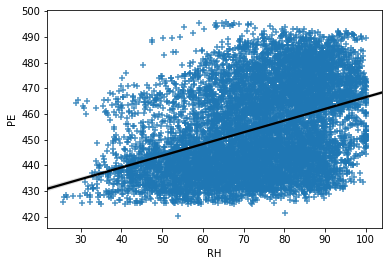

In [ ]:
X_RH = df["RH"]
X_RH = sm.add_constant(X_RH) # add a columns of ones to the array 
y = df["PE"]
results_RH = sm.OLS(y, X_RH).fit()
print(results_RH.params)
print(results_RH.summary())
sns.regplot(x= "RH", y="PE", data = df[["RH", "PE"]], line_kws={"color":"black"}, marker = "+")
plt.show()

In [ ]:
# find the outliers 
outliers_RH = results_RH.outlier_test()
outliers_RH = outliers_RH[outliers_RH["bonf(p)"]<0.10]
outliers_RH_points = outliers_RH.index
outliers_RH_points = df.iloc[outliers_RH_points]
print("There are {} outlier points".format(len(outliers_RH_points)))
outliers_RH_points

There are 0 outlier points


,AT,V,AP,RH,PE


In [ ]:
Comment: All of the predictors are statistically significant because they all have small p values. 

# Part D: Multiple Linear Regression Model

In [ ]:
X = df[["AT", "V", "AP", "RH"]]
X = sm.add_constant(X)
y = df["PE"]
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:08   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Comment: all of the p values are significatly small and close to zero, so we can reject the null hypothesis. 

# Part E: Coefficient Plot

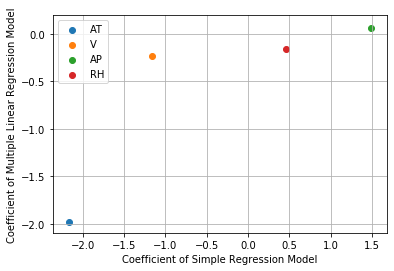

In [ ]:
single_reg = pd.Series([results_AT.params["AT"], results_V.params["V"], results_AP.params["AP"], results_RH.params["RH"]], 
                       index=["AT", "V","AP","RH"])
plt.scatter(single_reg["AT"], result.params["AT"], label = "AT")
plt.scatter(single_reg["V"], result.params["V"], label="V")
plt.scatter(single_reg["AP"], result.params["AP"], label = "AP")
plt.scatter(single_reg["RH"], result.params["RH"], label = "RH")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel("Coefficient of Simple Regression Model")
plt.ylabel("Coefficient of Multiple Linear Regression Model")
plt.show()

# Part F: Polynomial Features 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_AP_poly = poly.fit_transform(np.array(df["AP"]).reshape(-1,1))
X_V_poly = poly.fit_transform(np.array(df["V"]).reshape(-1,1))
X_AT_poly = poly.fit_transform(np.array(df["AT"]).reshape(-1,1))
X_RH_poly = poly.fit_transform(np.array(df["RH"]).reshape(-1,1))


In [ ]:
result_AP_poly = sm.OLS(df["PE"], X_AP_poly).fit()
print(result_AP_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:17   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

In [ ]:
result_V_poly = sm.OLS(df["PE"], X_V_poly).fit()
print(result_V_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:17   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

In [ ]:
result_AT_poly = sm.OLS(df["PE"], X_AT_poly).fit()
print(result_AT_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:18   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [ ]:
result_RH_poly = sm.OLS(df["PE"], X_RH_poly).fit()
print(result_RH_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:58:19   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

Comment: PE, AT and RH all have eviddence of nonlinear association with PE because they have 0 p values for polynomial features up to 3rd degree. V does not have evidence of nonlinear association with PE because V^2 has p value of 0.768.

# Part G: Interation of Predictors 

In [ ]:
import statsmodels.formula.api as smf
results_interaction = smf.ols(formula = "PE ~ AP + V + AT + RH + AP*V + AP*AT + AP*RH +V*AT + V*RH + AT*RH", data = df).fit()
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:02:03   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Comment: AP * V, V * AT, AP * RH and AT * RH are statistically signification 



# Part H: Model Improvement 

In [ ]:
# find all p values for all combinations of predictors 
import statsmodels.formula.api as smf
formula = "PE ~ AP+V+AT+RH+I(AP*AP)+I(AP*V)+I(AP*AT)+I(AP*RH)+I(V*V)+I(V*AT)+I(V*RH)+I(AT*AT)+I(AT*RH)+I(RH*RH)"
results_improve = smf.ols(formula = formula, data = df).fit()
print(results_improve.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:18:14   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7503.7323   1207.276     -6.215      0.0

In [ ]:
formula2 = "PE ~ AP+V+RH+I(AP*AP)+I(AP*RH)+I(V*AT)+I(AT*AT)+I(AT*RH)+I(RH*RH)"
results_improve_revised = smf.ols(formula = formula2, data = df).fit()
print(results_improve_revised.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:18:15   Log-Likelihood:                -27833.
No. Observations:                9568   AIC:                         5.569e+04
Df Residuals:                    9558   BIC:                         5.576e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6728.2277    947.691     -7.100      0.0

In [ ]:
from sklearn.model_selection import train_test_split
trainingSet, testingSset = train_test_split(df, test_size = 0.3, shuffle = True, random_state = 1)

In [ ]:
simple_model = smf.ols(formula = "PE~AP+V+AT+RH", data=trainingSet).fit()
simple_model_predictions = simple_model.predict(testingSset)

In [ ]:
improved_model = smf.ols(formula = formula2, data = trainingSet).fit()
improved_model_prediction = improved_model.predict(testingSset)

In [ ]:
from sklearn.metrics import mean_squared_error
simple_mse = mean_squared_error(testingSset["PE"], simple_model_predictions)
improved_mse = mean_squared_error(testingSset["PE"], improved_model_prediction)

In [ ]:
print("The MSE of a simple regression model is {:.4f}".format(simple_mse))
print("The MSE of the improved regression model is {:.4f}".format(improved_mse))

The MSE of a simple regression model is 20.7775
The MSE of the improved regression model is 19.9196


# Part I: KNN Regression 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
columns = ["AP", "V", "AT", "RH"]
X_train, X_test, y_train, y_test = trainingSet[columns], testingSset[columns], trainingSet["PE"], testingSset["PE"]

In [ ]:
MSE_test = []
MSE_train = []
k_inverse = []

for k in range (1, 101):
    k_inverse.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    predictions = knn.predict(X_test)
    MSE_test.append(mean_squared_error(y_test, predictions))
    MSE_train.append(mean_squared_error(y_train, knn.predict(X_train)))

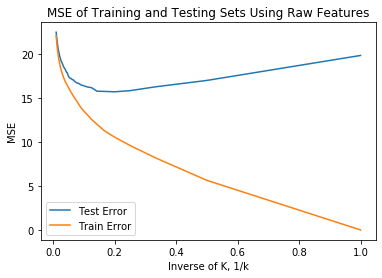

In [ ]:
plt.plot(k_inverse, MSE_test, label = "Test Error")
plt.plot(k_inverse, MSE_train, label = "Train Error" )
plt.title("MSE of Training and Testing Sets Using Raw Features")
plt.xlabel("Inverse of K, 1/k")
plt.ylabel("MSE")
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
optimal = np.argmin(MSE_test)
print("The optimal k = {}, and MSE = {:.4F}".format( optimal+1, MSE_test[optimal] ))

The optimal k = 5, and MSE = 15.7048


In [ ]:
# normalized features 
from sklearn.preprocessing import normalize

X_tain_normal = normalize(X_train)
X_test_nomal = normalize(X_test)

MSE_test_normal = []
MSE_train_normal = []
k_inverse = []

for k in range(1, 101):
    k_inverse.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_tain_normal, y_train)
    predictions = knn.predict(X_test_nomal)
    MSE_test_normal.append(mean_squared_error(y_test, predictions))
    MSE_train_normal.append(mean_squared_error(y_train, knn.predict(X_tain_normal)))

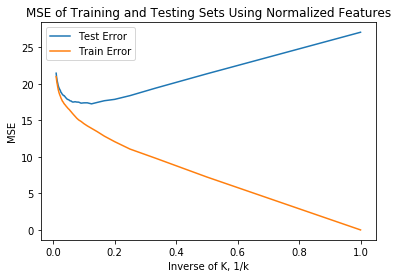

In [ ]:
plt.plot(k_inverse, MSE_test_normal, label = "Test Error")
plt.plot(k_inverse, MSE_train_normal, label = "Train Error" )
plt.title("MSE of Training and Testing Sets Using Normalized Features")
plt.xlabel("Inverse of K, 1/k")
plt.ylabel("MSE")
plt.legend(loc='best')
plt.show()

In [ ]:

optimal = np.argmin(MSE_test_normal)
print("The optimal k = {}, and MSE = {:.4F}".format(optimal+1, MSE_test_normal[optimal] ))

The optimal k = 8, and MSE = 17.2728


# Part J: KNN Regression VS. Linear Regression 

In [ ]:
table = pd.DataFrame(data=[simple_mse, improved_mse, MSE_test[4], MSE_test_normal[7]], columns=["MSE Values"], index = ["Simple Regression", "Improved Regression", "KNN, Raw Features", "KNN, Normalized Features"])

In [ ]:
table

,MSE Values
Simple Regression,20.777478
Improved Regression,19.919615
"KNN, Raw Features",15.704821
"KNN, Normalized Features",17.272750


Comments:


1.   The improved regression model achieves a slightly lower MSE by removing predictors with high p-values. 
2.   KNN regressors preform better than linear regression models in general
3.   Model trained using raw features achieves a lower MSE than it trained with normalized features. When normalize the features, all the vlues are "squashed" into range 0 to 1, thus it affects how distance is calculated. 
4.    All of the models' MSE is based on this particular set of training and testing data, if the train/test set split is done differently, they will probably have different MSE values. To further  evaluate the models' performance, we can do cross validation over different train test splits. 





# ISLR 2.4.1

(a) The sample size n is extremely large, and the number of predictors p is small.

Flexible method is better, because number of samples is larger than p value thus allows the flexible method to fit the data points more precisely.

(b) The number of predictors p is extremely large, and the number
of observations n is small.

Inflexible method is better, becuase flexible method tends to pverfit undeer this condition. 

(c) The relationship between the predictors and response is highly
non-linear.

Flexible method is better, because it is better at describing non-linear characteristics than inflexible methods. 

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely
high.


Inflexible method is better, because the flexible method may try to fit the noise and may cause overfitting. 

# ISLR 2.4.7

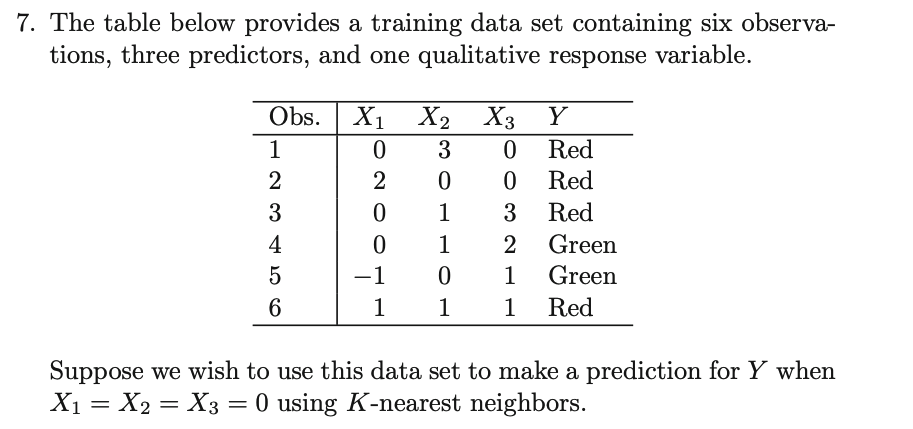

(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.

In [ ]:
o1=[0, 3, 0, "r"]
o2=[2, 0, 0, "r"]
o3=[0, 1, 3, "r"]
o4=[0, 1, 2, "g"]
o5=[-1, 0, 1, "g"]
o6=[1, 1, 1, "r"]
data = [o1,o2,o3,o4,o5,o6]


In [ ]:
data

[[0, 3, 0, 'r'],
 [2, 0, 0, 'r'],
 [0, 1, 3, 'r'],
 [0, 1, 2, 'g'],
 [-1, 0, 1, 'g'],
 [1, 1, 1, 'r']]

In [ ]:
import math
distance = [math.sqrt(o[0]**2+o[1]**2+o[2]**2) for o in data]

In [ ]:
distance

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

(b) What is our prediction with K = 1? Why?

Green, when K=1 the closest point is o5. thus the test point takes on the label of o5 which is green. 

(c) What is our prediction with K = 3? Why?

Red, when K=3, the nearest neighbors are o5, o6, o2. By majority polling, the testing point label is red.

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or
small? Why?

K is small because model can fit to the non-linear pattern with small K. If k is large, the decision boundary tends to be linear. 
